In [124]:
#Import libararies
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,f_classif
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree

# 1. Import the data as a data frame and ensure it is loaded correctly.

In [125]:
df_mushrooms = pd.read_csv("mushrooms.csv")

In [126]:
df_mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# 2. Convert the categorical features (all of them) to dummy variables.

In [127]:
df_mushrooms = pd.get_dummies(df_mushrooms,
                     columns = df_mushrooms.select_dtypes(include='object').keys())

In [128]:
df_mushrooms.head()

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


# 3. Split the data into a training and test set.

In [129]:
X = df_mushrooms.drop(['class_e','class_p'], axis=1)  
y = df_mushrooms["class_e"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)   

# 4. Fit a decision tree classifier on the training set

In [130]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

# 5. Report the accuracy and create a confusion matrix for the model prediction on the test set.

In [131]:
y_pred_dt = dt.predict(X_test)

In [132]:
print("Test Accuracy: {}%".format(round(dt.score(X_test, y_test)*100, 2)))

Test Accuracy: 100.0%


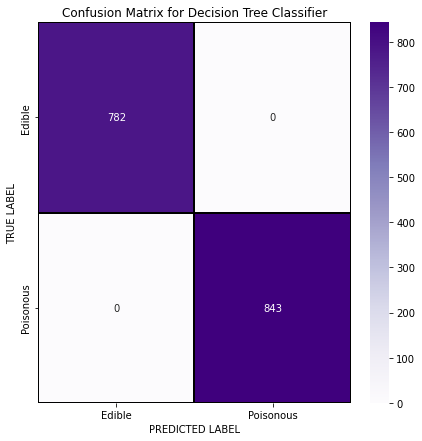

In [133]:
cm = confusion_matrix(y_test, y_pred_dt)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

# 6. Create a visualization of the decision tree

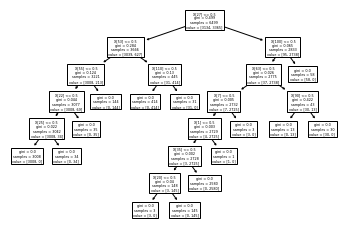

In [134]:
tree.plot_tree(dt);

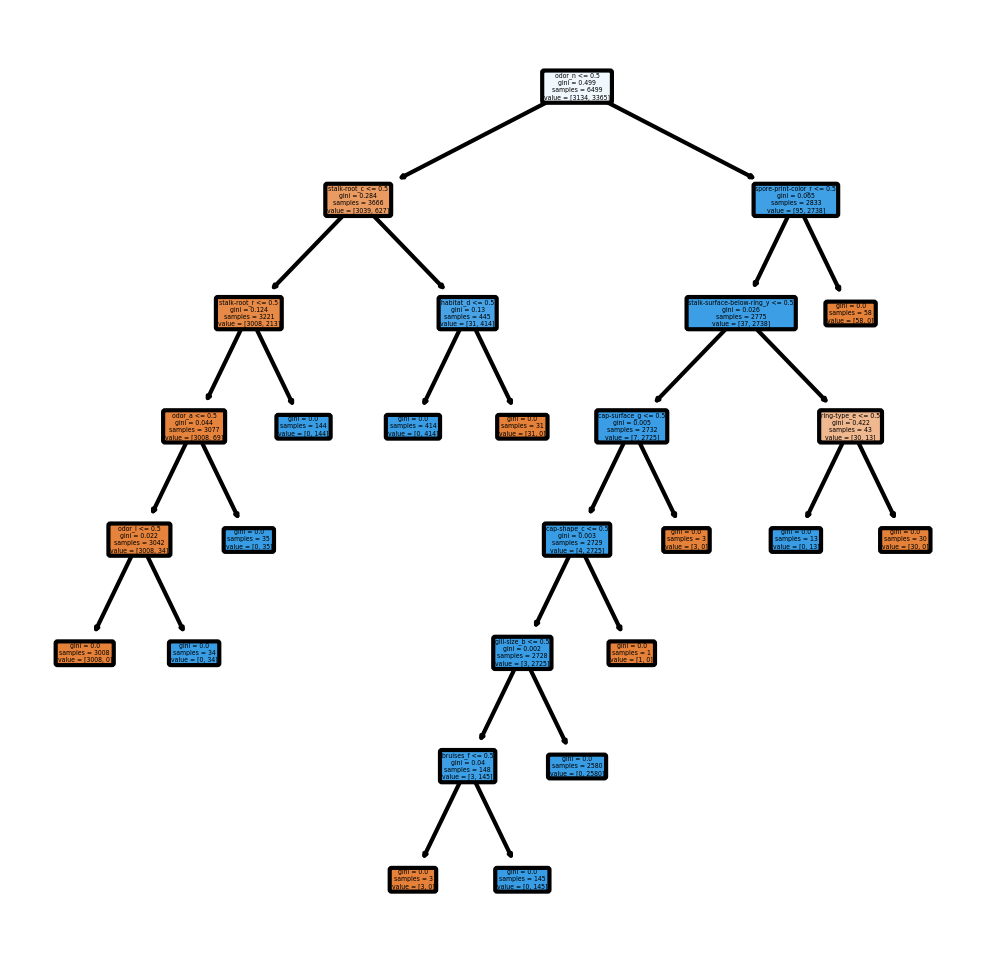

In [135]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dt, feature_names=X.columns,  
                         filled=True, rounded=True);
fig.savefig('imagename.png')

# 7. Use a χ2-statistic selector to pick the five best features for this data (see section 10.4 of the Machine Learning with Python Cookbook).

In [136]:
#Convert to categorical data by converting data to integers

In [137]:
features=X.astype(int)
test_features = y

In [138]:
#Select 5 best feature with highest ch-squared statistics
chi2_selector = SelectKBest(chi2,k=5)
features_kbest = chi2_selector.fit_transform(features,y)

In [139]:
#Show results
print("Original number of features:", features.shape[1])
print("KBest (Reduced) number of features:", features_kbest.shape[1])

Original number of features: 117
KBest (Reduced) number of features: 5


# Which five features were selected in step 7? 

In [140]:
cols= chi2_selector.get_support(indices=True)

In [141]:
features_df_5 = features.iloc[:,cols]

In [142]:
features_df_5

,odor_f,odor_n,gill-color_b,stalk-surface-above-ring_k,stalk-surface-below-ring_k
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
8119,0,1,0,0,0
8120,0,1,0,0,0
8121,0,1,0,0,0
8122,0,0,1,0,1


# 8. Repeat steps 4 and 5 with the five best features selected in step 7.

In [143]:
in_train, in_test, tar_train, tar_test = train_test_split(features_df_5, y, random_state=42, test_size=0.2)   

In [144]:
from sklearn.tree import DecisionTreeClassifier

test = SelectKBest(score_func=chi2, k=5)
fit = test.fit(X, y)
fit.scores_

array([2.55712333e+02, 4.29826353e+00, 1.70642835e+00, 1.95193796e+02,
       2.97794677e+01, 3.22966436e+00, 2.21636970e+02, 4.29826353e+00,
       5.07331581e+01, 3.83744391e+01, 3.62968476e+01, 7.72001030e+00,
       6.24697548e+01, 1.35617524e+01, 1.14919473e+01, 9.60990302e+00,
       1.48897338e+01, 1.48897338e+01, 1.26598964e+02, 9.00691216e+01,
       8.49174461e+02, 1.19427735e+03, 3.72243346e+02, 2.06316650e+02,
       2.32106231e+03, 3.72243346e+02, 3.86843718e+01, 2.83618795e+03,
       2.75088866e+02, 6.18949949e+02, 6.18949949e+02, 1.32105267e+02,
       3.50544682e+00, 1.59241838e+02, 8.26795274e+02, 7.32565282e+02,
       1.63660683e+03, 1.85684985e+03, 8.93384030e+01, 1.06660990e+02,
       1.67863351e+02, 1.72779150e+02, 5.90761088e+02, 5.95589354e+01,
       1.68327885e+01, 2.57895812e+01, 2.91276850e+02, 3.70376802e+02,
       1.76262994e+01, 4.79595103e+01, 3.65941055e+01, 5.14759136e+02,
       1.36399901e+00, 3.61470789e+02, 2.88169796e+02, 1.78676806e+02,
      

In [145]:
X_new=test.fit_transform(X, y)

In [146]:
dt = DecisionTreeClassifier()
dt.fit(in_train, tar_train)

DecisionTreeClassifier()

In [147]:
y5_pred_dt = dt.predict(in_test)

In [148]:
print("Test Accuracy: {}%".format(round(dt.score(in_test, tar_test)*100, 2)))

Test Accuracy: 92.68%


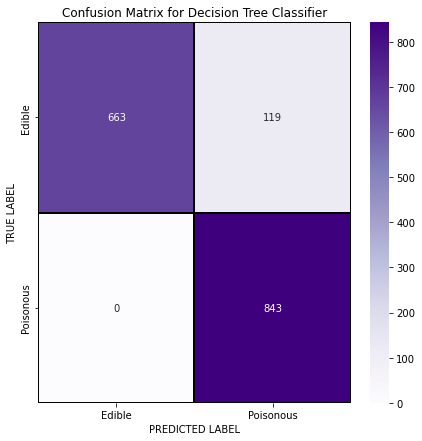

In [149]:
cm = confusion_matrix(tar_test, y5_pred_dt)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

# Summarize your findings.

I have dropped class_p and class_e from the training dataset and add class_e as target dataset. Reason being both are inter-realted and no point having one in target and other in training. if value of class_e is 0 then class_p is 1 and vice-versa.

With initial dataset, we got accuracy of 100% which is ideal and I am not confident a prediction model being ideal. However, with χ2-statistic selector dataset, we got accuracy of 92.68% which is a very good prediction model. 

With this we can prove that prediction model with top 5 feature is perfect and can be used for this dataset.